In [0]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
X = breast_cancer.data
Y = breast_cancer.target

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y, random_state=1)

In [0]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None

  def model(self,x):
    return 1 if(np.dot(self.w,x)>=self.b) else 0

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y,epochs,lr):
    self.w = np.ones(X.shape[1])
    self.b = 0
    # accuracy oscillates so store and find maximum accuracy
    accuracy = {}
    max_acc = 0

    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if y_pred == 0 and y==1:
          self.w = self.w+lr*x
          self.b = self.b +lr*1
        elif y_pred == 1 and y==0:
          self.w = self.w-lr*x
          self.b = self.b -lr*1
      accuracy[i] = accuracy_score(self.predict(X),Y)
      if accuracy[i]>max_acc:
        max_acc = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    self.w = chkptw
    self.b = chkptb
    print(max_acc)
    plt.plot(list(accuracy.values()))
    plt.ylim([0,1])
    plt.show()

In [0]:
percep = Perceptron()

0.94921875


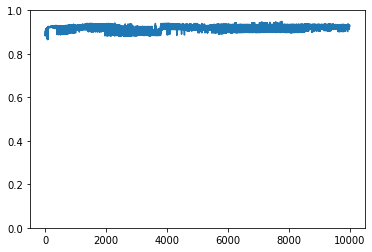

In [0]:
percep.fit(X_train,Y_train,10000,0.0001) # Number of epoch - how many times to go through the data is a hyper parameter

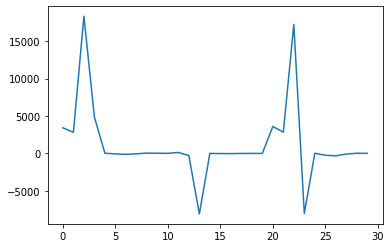

In [0]:
plt.plot(percep.w)
plt.show()

In [0]:
Y_pred_train = percep.predict(X_train)
print(accuracy_score(Y_pred_train,Y_train))

0.921875


In [0]:
Y_pred_test = percep.predict(X_test)
print(accuracy_score(Y_pred_test,Y_test))

0.9298245614035088


# Check Pointing